In [153]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
## Create dataset

X = 6 * np.random.rand(100,1) - 3
Y = 0.5 * X ** 2 + 1.5 * X + 2 + np.random.randn(100, 1) 

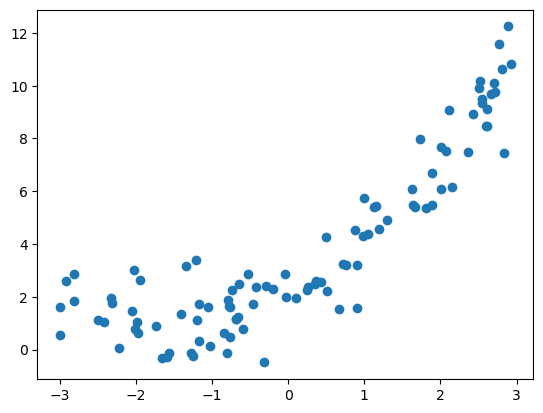

In [155]:
## Visualize the dataset
plt.scatter(X, Y)

In [156]:
### Train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42 )

In [157]:
## Implement linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [158]:
## R2_score
from sklearn.metrics import r2_score
r2_score(y_test, regression.predict(X_test))

0.4941621740072366

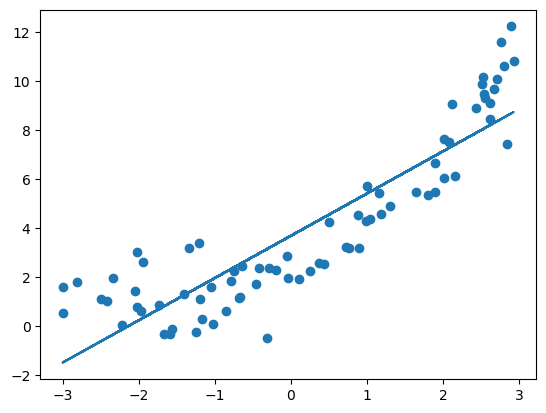

In [159]:
## Visualize the model
plt.plot(X_train, regression.predict(X_train))
plt.scatter(X_train, y_train)

In [160]:
### Lets apply polynomial regression due to the r2_score is very less 
### Its not a linear regression as per the above visualization 

from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures()
X_train_poly = polynomial.fit_transform(X_train)
X_test_poly = polynomial.transform(X_test)

In [161]:
X_train_poly

array([[ 1.00000000e+00, -7.85131428e-01,  6.16431359e-01],
       [ 1.00000000e+00,  2.88490522e+00,  8.32267813e+00],
       [ 1.00000000e+00,  2.14969894e+00,  4.62120552e+00],
       [ 1.00000000e+00, -6.64449889e-01,  4.41493655e-01],
       [ 1.00000000e+00,  2.70823440e+00,  7.33453355e+00],
       [ 1.00000000e+00, -4.63704102e-01,  2.15021494e-01],
       [ 1.00000000e+00,  1.30173032e+00,  1.69450182e+00],
       [ 1.00000000e+00, -6.41443115e-01,  4.11449270e-01],
       [ 1.00000000e+00,  7.66175008e-01,  5.87024142e-01],
       [ 1.00000000e+00,  8.82203288e-01,  7.78282641e-01],
       [ 1.00000000e+00,  2.00684694e+00,  4.02743464e+00],
       [ 1.00000000e+00, -7.42670802e-01,  5.51559921e-01],
       [ 1.00000000e+00, -8.47376734e-01,  7.18047329e-01],
       [ 1.00000000e+00,  2.66288685e+00,  7.09096636e+00],
       [ 1.00000000e+00,  2.61458909e+00,  6.83607609e+00],
       [ 1.00000000e+00, -6.84572419e-01,  4.68639397e-01],
       [ 1.00000000e+00, -2.81484712e+00

In [162]:
regression_poly = LinearRegression()
regression_poly.fit(X_train_poly, y_train)
y_pred = regression_poly.predict(X_test_poly)


In [163]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.8610244932702031


In [164]:
## Coeffienct and intercept

print(f"Normal regression coefficient {regression.coef_} and intercept {regression.intercept_}")
print(f"Ploynomial regression coefficient {regression_poly.coef_} and intercept {regression_poly.intercept_}")

Normal regression coefficient [[1.72555546]] and intercept [3.70317273]
Ploynomial regression coefficient [[0.         1.54551355 0.46022626]] and intercept [2.26826879]


In [165]:
### Using degrees in ploynomial
poly = PolynomialFeatures(degree=15, include_bias=True)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [166]:
regression_with_degree = LinearRegression()
regression_with_degree.fit(X_train, y_train)
y_pred = regression_with_degree.predict(X_test)


In [167]:
print(r2_score(y_test, y_pred))

0.8415209129539231


In [168]:
## Prediction for new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.fit_transform(X_new)


In [171]:
y_new_pred = regression_with_degree.predict(X_new_poly)

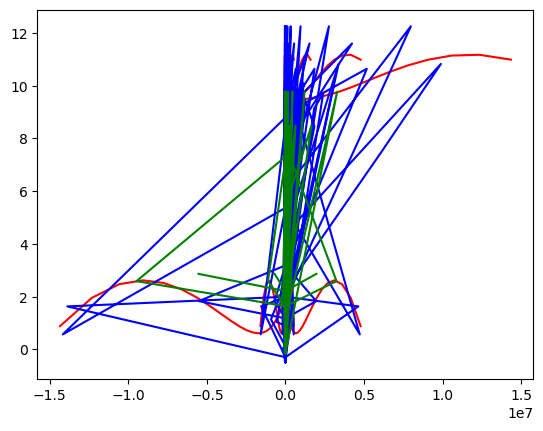

In [175]:
plt.plot(X_new_poly, y_new_pred, "r")
plt.plot(X_train, y_train, "b")
plt.plot(X_test, y_test, "g")